In [7]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts

%matplotlib inline

In [8]:
iris_data = datasets.load_iris()

In [9]:
def read_in_and_split_data(iris_data):
    X = iris_data['data']
    Y = iris_data['target']
    train_data, test_data, train_targets, test_targets = tts(X,Y, test_size = 0.1)
    return (train_data, test_data, train_targets, test_targets) 

In [10]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [11]:
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [12]:
train_data.shape

(135, 4)

In [13]:
train_targets.shape

(135, 3)

In [14]:
def compile_model(model):
    optim = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])  

In [15]:
def train_model(model, train_data, train_targets, epochs):
    history = model.fit(train_data, train_targets,validation_split = 0.2, epochs = epochs)
    return history

In [16]:
def get_model(input_shape, dropout_rate, weight_decay):

    model = Sequential()
    model.add(Dense(64, kernel_initializer= 'he_uniform', bias_initializer = 'ones',kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = (4,)))
    model.add(Dense(128,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dense(128,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dense(128,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(64,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dense(64,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dense(64,kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    return model


In [17]:
model = get_model(train_data[0].shape, 0.3, 0.001)

In [18]:
compile_model(model)

In [19]:
history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
4/4 [==============================] - 0s 62ms/step - loss: 2.0136 - accuracy: 0.3704 - val_loss: 2.0440 - val_accuracy: 0.3704
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 2.0159 - accuracy: 0.3611 - val_loss: 2.0231 - val_accuracy: 0.3704
Epoch 3/800
4/4 [==============================] - 0s 7ms/step - loss: 1.9587 - accuracy: 0.4167 - val_loss: 2.0088 - val_accuracy: 0.3704
Epoch 4/800
4/4 [==============================] - 0s 7ms/step - loss: 1.9203 - accuracy: 0.4815 - val_loss: 1.9958 - val_accuracy: 0.3704
Epoch 5/800
4/4 [==============================] - 0s 7ms/step - loss: 1.9565 - accuracy: 0.4907 - val_loss: 1.9809 - val_accuracy: 0.3704
Epoch 6/800
4/4 [==============================] - 0s 6ms/step - loss: 1.8954 - accuracy: 0.5185 - val_loss: 1.9693 - val_accuracy: 0.3704
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 1.8510 - accuracy: 0.5648 - val_loss: 1.9567 - val_accuracy: 0.3704
Epoch 8/800
4/4 [=========

In [20]:
df1 = pd.DataFrame(history.history)
df1.head()

,loss,accuracy,val_loss,val_accuracy
0,2.013626,0.370370,2.044026,0.37037
1,2.015878,0.361111,2.023106,0.37037
2,1.958708,0.416667,2.008779,0.37037
3,1.920310,0.481481,1.995841,0.37037
4,1.956528,0.490741,1.980913,0.37037


Text(0.5, 1.0, 'Accuracy vs Epochs')

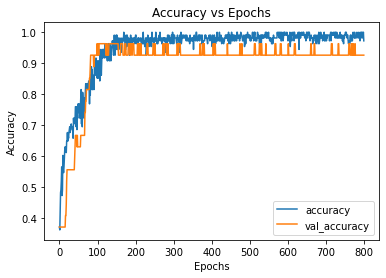

In [21]:
df1.plot(y = ['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

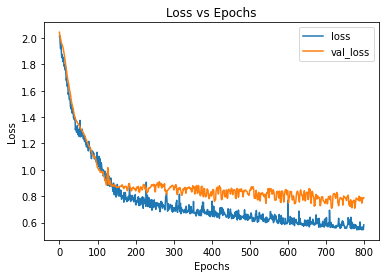

In [22]:
df1.plot(y = ['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

In [23]:
def get_callbacks():
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30, mode = 'min')
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.2, patience = 20)
    return (early_stopping, learning_rate_reduction)

In [24]:
call_model = get_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=10)

Epoch 1/800
Epoch 2/800
Epoch 3/800
Epoch 4/800
Epoch 5/800
Epoch 6/800
Epoch 7/800
Epoch 8/800
Epoch 9/800
Epoch 10/800
Epoch 11/800
Epoch 12/800
Epoch 13/800
Epoch 14/800
Epoch 15/800
Epoch 16/800
Epoch 17/800
Epoch 18/800
Epoch 19/800
Epoch 20/800
Epoch 21/800
Epoch 22/800
Epoch 23/800
Epoch 24/800
Epoch 25/800
Epoch 26/800
Epoch 27/800
Epoch 28/800
Epoch 29/800
Epoch 30/800
Epoch 31/800
Epoch 32/800
Epoch 33/800
Epoch 34/800
Epoch 35/800
Epoch 36/800
Epoch 37/800
Epoch 38/800
Epoch 39/800
Epoch 40/800
Epoch 41/800
Epoch 42/800
Epoch 43/800
Epoch 44/800
Epoch 45/800
Epoch 46/800
Epoch 47/800
Epoch 48/800
Epoch 49/800
Epoch 50/800
Epoch 51/800
Epoch 52/800
Epoch 53/800
Epoch 54/800
Epoch 55/800
Epoch 56/800
Epoch 57/800
Epoch 58/800
Epoch 59/800
Epoch 60/800
Epoch 61/800
Epoch 62/800
Epoch 63/800
Epoch 64/800
Epoch 65/800
Epoch 66/800
Epoch 67/800
Epoch 68/800
Epoch 69/800
Epoch 70/800
Epoch 71/800
Epoch 72/800
Epoch 73/800
Epoch 74/800
Epoch 75/800
Epoch 76/800
Epoch 77/800
Epoch 78

In [25]:
df = pd.DataFrame(call_history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.284476,0.307018,1.322939,0.428571,0.0001
1,1.243210,0.342105,1.271373,0.428571,0.0001
2,1.218604,0.385965,1.229783,0.428571,0.0001
3,1.187167,0.368421,1.191562,0.428571,0.0001
4,1.206625,0.377193,1.164207,0.428571,0.0001


Text(0.5, 1.0, 'Accuracy vs Epochs')

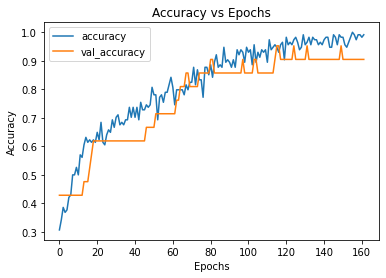

In [26]:
df.plot(y = ['accuracy','val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

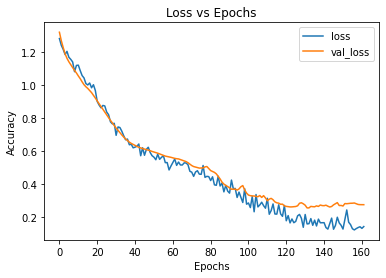

In [27]:
df.plot(y = ['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Loss vs Epochs')

In [28]:
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.099
Test accuracy: 100.00%
